## DATA UNDERSTANDING

Dataset source : https://www.kaggle.com/olistbr/brazilian-ecommerce

Pertanyaan bisnis:
- Penjualan Terbanyak dan Terendah Berdasarkan Kategori Produk
- Revenue Terbanyak dan Terendah Berdasarkan Kategori Produk
- Persentase tingkat kepuasan pelanggan.
- Payment type.
- Rata-rata waktu pengiriman barang.


Summary Data

- Data Order : berisi data order yang terjadi di Olist dengan detail informasi seperti order id, order item, product, seller, shipping limit fare, price, freight_value
- Data Payment : berisi detail payment type, installment, payment value, payment sequential dari tiap-tiap order id
- Data Review : berisi detail review hingga rating dari tiap-tiap order id
- Data Delivery : berisi detail customer id, order status, dan timestamp delivery (mulai dari payment hingga delivered) dari tiap order id
- Data Produk : berisi detail produk, mulai dari kategori, hingga dimensi
- Data Seller : berisi detail seller dan lokasi seller (zipcode,city, serta state)
- Data Kategori Produk : detail kategori produk dalam bahasa inggris
- Data Customer : berisi customer id, cust uniq id, dan customer zipcode,city, serta state



## DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas import Series
import itertools
import warnings                 
import plotly as py
warnings.filterwarnings("ignore")

In [2]:
df_cust = pd.read_csv('olist_customers_dataset.csv')
df_order = pd.read_csv('olist_order_items_dataset.csv')
df_payment = pd.read_csv('olist_order_payments_dataset.csv')
df_review = pd.read_csv('olist_order_reviews_dataset.csv') 
df_delivery = pd.read_csv('olist_orders_dataset.csv')
df_product = pd.read_csv('olist_products_dataset.csv') 
df_seller = pd.read_csv('olist_sellers_dataset.csv')
df_catprod = pd.read_csv('product_category_name_translation.csv')

In [3]:
all_table = [df_cust, df_order, df_payment, df_review, df_delivery, df_product, df_seller, df_catprod]
name_table = ['Data Customer',  'Data Order', 'Data Payment', 'Data Review', 'Data Delivery', 'Data Produk', 'Data Seller','Data Kategori Produk']

Melihat panjang data dan menampilkan 5 baris setiap tabel 

In [4]:
for item in range(len(all_table)):
    print(' ')
    print(name_table[item] + ':')
    print('length data ' + str(len(all_table[item])))
    display(all_table[item].head())

 
Data Customer:
length data 99441


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


 
Data Order:
length data 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


 
Data Payment:
length data 103886


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


 
Data Review:
length data 99224


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


 
Data Delivery:
length data 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


 
Data Produk:
length data 32951


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


 
Data Seller:
length data 3095


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


 
Data Kategori Produk:
length data 71


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Check semua info data frame

In [5]:
for data_frame in all_table:
    print (data_frame.info())
    print ("**" * 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4



Berdasarkan info di atas terdapat type columns yang tidak sesuai, yaitu pada table orders kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.


In [6]:
# Handle type data yang tidak sesuai
lists = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for cols in lists:
    df_delivery[cols] = pd.to_datetime(df_delivery[cols])


In [7]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [8]:
df_delivery['years'] = pd.DatetimeIndex(df_delivery['order_purchase_timestamp']).year
df_delivery

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,years
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018


Check missing value 

In [9]:
for data_frame in all_table:
    print (data_frame.isnull().sum());
    print ("--"*50);

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
----------------------------------------------------------------------------------------------------
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------------------------------------------------------------------------------------
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
----------------------------------------------------------------------------------------------------
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
revie

Berdasarkan hasil pengecekan missing value di atas, bahwa terdapat missing value pada data frame/tabel reviews, orders dan products. 

## Handle missing Value

Pada data frame reviews, karena nilai missing value terdapat pada kolom review_comment_title dan review_comment_message. Oleh karena itu, missing value dapat diisi dengan nilai "None"

In [10]:
df_review = df_review.fillna('None')

Pada data frame orders karena missing value terdata pada kolom bertipe waktu, maka kita dapat menggunakan metode ffill() untuk mengisinya.

In [11]:
df_order = df_order.fillna(method = 'ffill')

Pada data frame products, kita dapat mengisi missing value dengan "orthers" untuk kolom product_category_name dan sisanya diisi dengan median dari masing-masing kolom yang mengandung missing value. Nilai median dipilih karena, nilai median cenderung tidak terpaku atau terpengaruhi nilai ekstrim yang ada pada setiap kolom numeric.

In [12]:
df_product['product_category_name'] = df_product['product_category_name'].fillna('orthers')


In [13]:
# Menghitung nilai median dari setiap kolom numerik
median_values = df_product[['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].median()

# Mengisi missing value dengan nilai median dari masing-masing kolom
df_product['product_name_lenght'].fillna(median_values['product_name_lenght'], inplace=True)
df_product['product_description_lenght'].fillna(median_values['product_description_lenght'], inplace=True)
df_product['product_photos_qty'].fillna(median_values['product_photos_qty'], inplace=True)
df_product['product_weight_g'].fillna(median_values['product_weight_g'], inplace=True)
df_product['product_length_cm'].fillna(median_values['product_length_cm'], inplace=True)
df_product['product_height_cm'].fillna(median_values['product_height_cm'], inplace=True)
df_product['product_width_cm'].fillna(median_values['product_width_cm'], inplace=True)


Setelah melakukan handle missing value, dilakukan pengecekan kembali untuk memastikan tidak ada missing value pada data frame di atas.

In [14]:
lists = [df_review, df_order, df_product]

for subscripts in lists:
    print (subscripts.isnull().sum())
    print ("--"*50)

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
----------------------------------------------------------------------------------------------------
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------------------------------------------------------------------------------------
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
---------------------------------------------------------------------------------------------

Berdasarkan hasil pengecekan di atas. Terbukti bahwa sudah tidak adanya missing value untuk setiap masing-masing kolom.

Check data duplicate 

In [15]:
all_table = [df_cust, df_order, df_payment, df_review, df_delivery, df_product, df_seller, df_catprod]

for df, df_name in zip(all_table, ["Customer", "Order", "Payment", "Review", "Delivery", "Product", "Seller", "Category_Product"]):
    print(f"Duplicates in {df_name} DataFrame:")
    print(df.duplicated().sum())
    print("--" * 50)


Duplicates in Customer DataFrame:
0
----------------------------------------------------------------------------------------------------
Duplicates in Order DataFrame:
0
----------------------------------------------------------------------------------------------------
Duplicates in Payment DataFrame:
0
----------------------------------------------------------------------------------------------------
Duplicates in Review DataFrame:
0
----------------------------------------------------------------------------------------------------
Duplicates in Delivery DataFrame:
0
----------------------------------------------------------------------------------------------------
Duplicates in Product DataFrame:
0
----------------------------------------------------------------------------------------------------
Duplicates in Seller DataFrame:
0
----------------------------------------------------------------------------------------------------
Duplicates in Category_Product DataFrame:
0
------

Tidak terdapat data duplicate di setiap data frame.

##Exploratory Data Analysis (EDA)

Explore Order Items Dataframe

Berdasarkan pada keterangan dataset di kaggle, untuk mendapatkan jumlah harga setiap pemesanan, perlu dikalikan kolom 'order_item_id' dengan kolom 'price'. Begitupun juga untuk mendapatkan total harga ongkos kirim, perlu dikalikan kolom 'order_items_id' dengan 'freight_value'.


In [16]:
#Mendapatkan jumlah harga untuk setiap pemesanan
df_order['total_price'] = df_order['order_item_id'] * df_order['price']

#Mendapatkan jumlah ongkir untuk setiap pemesanan
df_order['total_freight_value'] = df_order['order_item_id'] * df_order['freight_value']

In [17]:
#Mendapatkan jumlah harga yang harus dibayarkan untuk setiap pemesanan
df_order['total_order_value'] = df_order['total_price'] + df_order['total_freight_value']

In [18]:
df_order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,total_freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04


Explore Order Review Dataframe

In [19]:
#Mengetahui jumlah review untuk setiap skor
df_review.groupby('review_score').agg({
  'review_id':'count'
  })

,review_id
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


In [20]:
df_review['review_score'].mean()

4.08642062404257

In [21]:
#Mengetahui persentase review untuk setiap skor
review_percentage = df_review['review_score'].value_counts(normalize=True).round(3) * 100
review_percentage

review_score
5    57.8
4    19.3
1    11.5
3     8.2
2     3.2
Name: proportion, dtype: float64

Terlihat review dengan skor 5 memiliki persentase terbanyak, yakni 57.8%. Disusul oleh skor 4 dengan persentase 19.3%. Kemudian Skor 1 dengan persentase 11.5%. Skor 3 dengan persentase 8.2%. Dan yang terakhir skor 2 dengan persentase 3.2%.

Explore Korelasi Antar Dataframe

In [22]:
#Menggabungkan products_df dengan category_translation_df untuk mengganti bahasanya menjadi inggris
df_product = df_product.merge(df_catprod, on='product_category_name', how='outer')

In [23]:
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [24]:
# menggabungkan beberapa data frame 
all_df = df_order.copy()
all_df = pd.merge(all_df, df_payment, on='order_id')
all_df = pd.merge(all_df, df_delivery, on='order_id')
all_df = pd.merge(all_df, df_review, on='order_id')
all_df = pd.merge(all_df, df_product, left_on='product_id', right_on='product_id')
# Melihat hasil gabungan data
all_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,total_freight_value,total_order_value,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9,13.29,72.19,...,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,55.9,17.96,73.86,...,2017-07-17 12:50:07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,64.9,18.33,83.23,...,2018-06-06 21:41:12,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,58.9,16.17,75.07,...,2017-08-13 03:35:17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,58.9,13.29,72.19,...,2017-08-28 00:51:18,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [25]:
#Mengetahui kategori produk mana yang memiliki penjualan paling banyak dan paling sedikit
all_df.groupby('product_category_name_english').agg({
  'order_id' : 'count'
  }).sort_values(by='order_id', ascending=False)

,order_id
product_category_name_english,
bed_bath_table,11847
health_beauty,9944
sports_leisure,8942
furniture_decor,8743
computers_accessories,8105
...,...
arts_and_craftmanship,24
la_cuisine,15
cds_dvds_musicals,14


Berdasarkan tabel di atas, kategori produk 'bed_bath_table' memiliki penjualan terbanyak. Sedangkan kategori produk 'security_and_services' memiliki penjualan paling sedikit.

In [26]:
#Mengetahui kategori produk mana yang memiliki revenue paling banyak dan paling sedikit
all_df.groupby('product_category_name_english').agg({
  'payment_value' : 'sum'
  }).sort_values(by='payment_value', ascending=False)

,payment_value
product_category_name_english,
bed_bath_table,1725465.67
health_beauty,1646292.53
computers_accessories,1592611.66
furniture_decor,1427214.01
watches_gifts,1420682.17
...,...
flowers,1922.77
home_comfort_2,1458.54
cds_dvds_musicals,1199.43


Berdasarkan tabel di atas, kategori produk 'bed_bath_table' memiliki revenue terbanyak dan kategori produk 'security_and_services' memiliki revenue yang paling sedikit juga.


##Visualization

Persentase tingkat kepuasan pelanggan selama berbelanja.

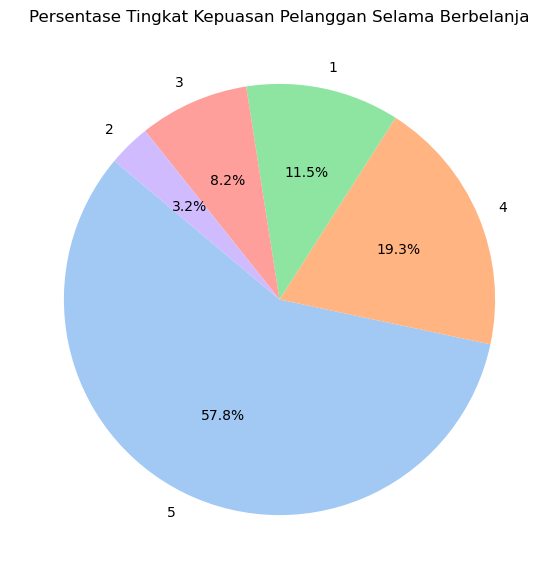

In [27]:
reviewscore = df_review['review_score'].value_counts()

#Plotting pie chart
plt.figure(figsize=(10, 7))
plt.pie(reviewscore, labels=reviewscore.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Persentase Tingkat Kepuasan Pelanggan Selama Berbelanja')
plt.show()

Mayoritas pelanggan puas dengan pengalaman mereka selama berbelanja, namun terdapat persentase yang signifikan (11.5%) yang tidak puas.

Kategori produk yang memiliki penjualan paling banyak dan paling sedikit.

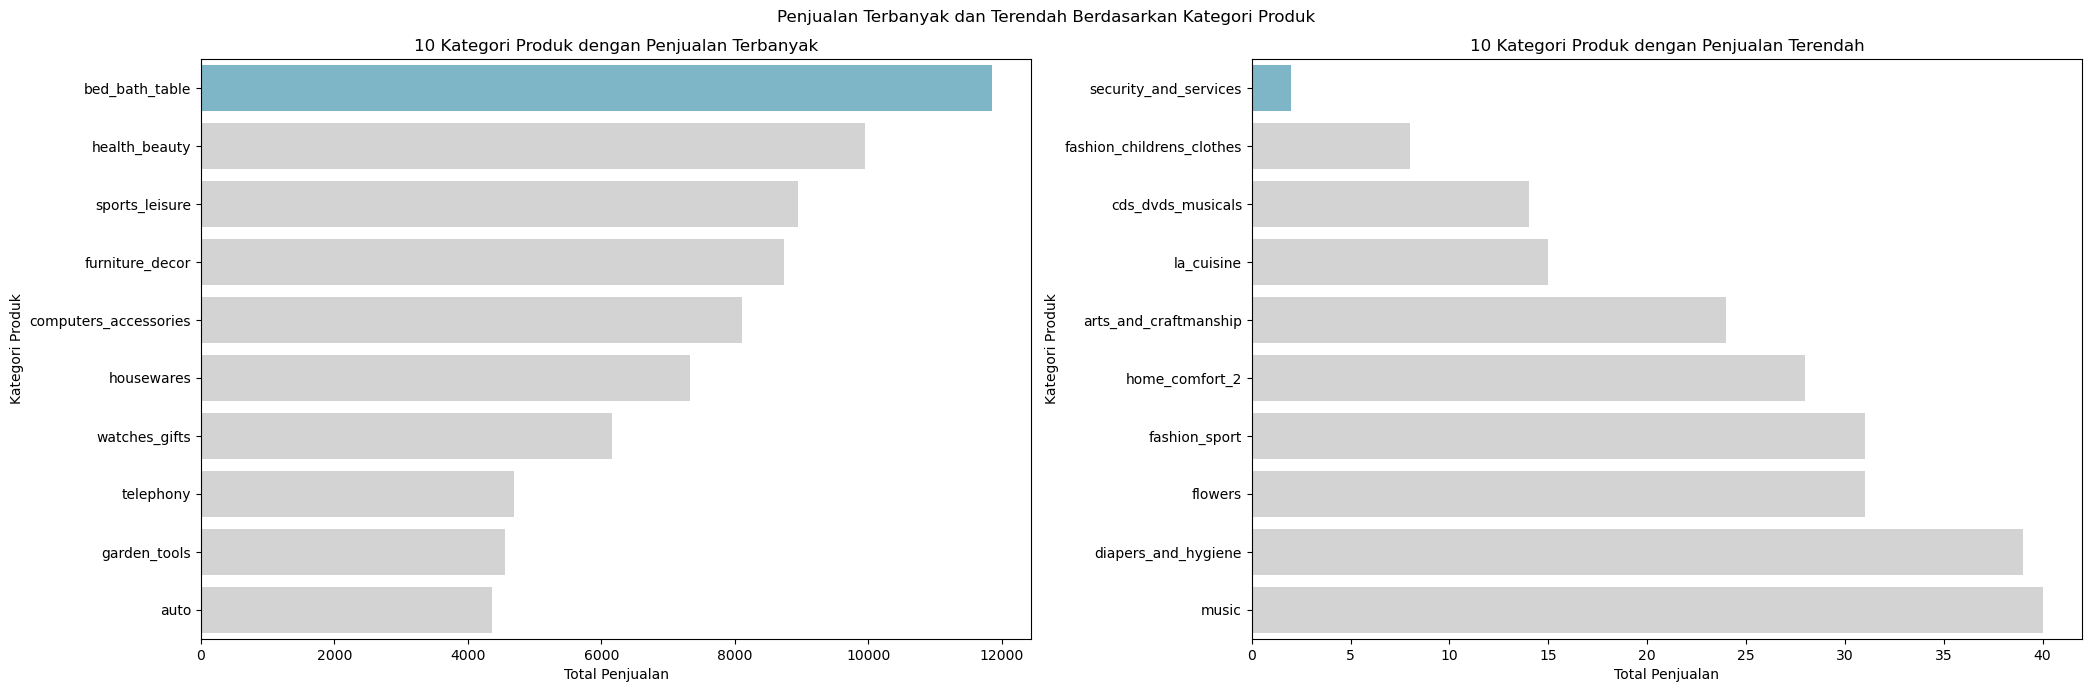

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

#Jumlah penjualan terbanyak
top_order = all_df.groupby('product_category_name_english').order_id.count().reset_index()
top_order.rename(columns={
  'order_id' : 'total_order'
  }, inplace=True)

top_order

#Plotting bar chart
sns.barplot(x='total_order', y='product_category_name_english', data=top_order.nlargest(10, 'total_order'), ax=ax[0], palette=colors_)
ax[0].set_title('10 Kategori Produk dengan Penjualan Terbanyak')
ax[0].set_xlabel('Total Penjualan')
ax[0].set_ylabel('Kategori Produk')

#Jumlah penjualan terendah
bottom_order = all_df.groupby('product_category_name_english').order_id.count().reset_index()
bottom_order.rename(columns={
  'order_id' : 'total_order'
  }, inplace=True)

bottom_order

#Plotting bar chart
sns.barplot(x='total_order', y='product_category_name_english', data=bottom_order.nsmallest(10, 'total_order'), ax=ax[1], palette=colors_)
ax[1].set_title('10 Kategori Produk dengan Penjualan Terendah')
ax[1].set_xlabel('Total Penjualan')
ax[1].set_ylabel('Kategori Produk')

plt.suptitle("Penjualan Terbanyak dan Terendah Berdasarkan Kategori Produk")
plt.tight_layout(pad=1)
plt.show()

Terlihat kategori produk 'bed_bath_table' memiliki penjualan tertinggi, sedangkan kategori produk 'security_and_services' memiliki penjualan terendah.

Kategori produk  yang memiliki revenue paling banyak dan paling sedikit.

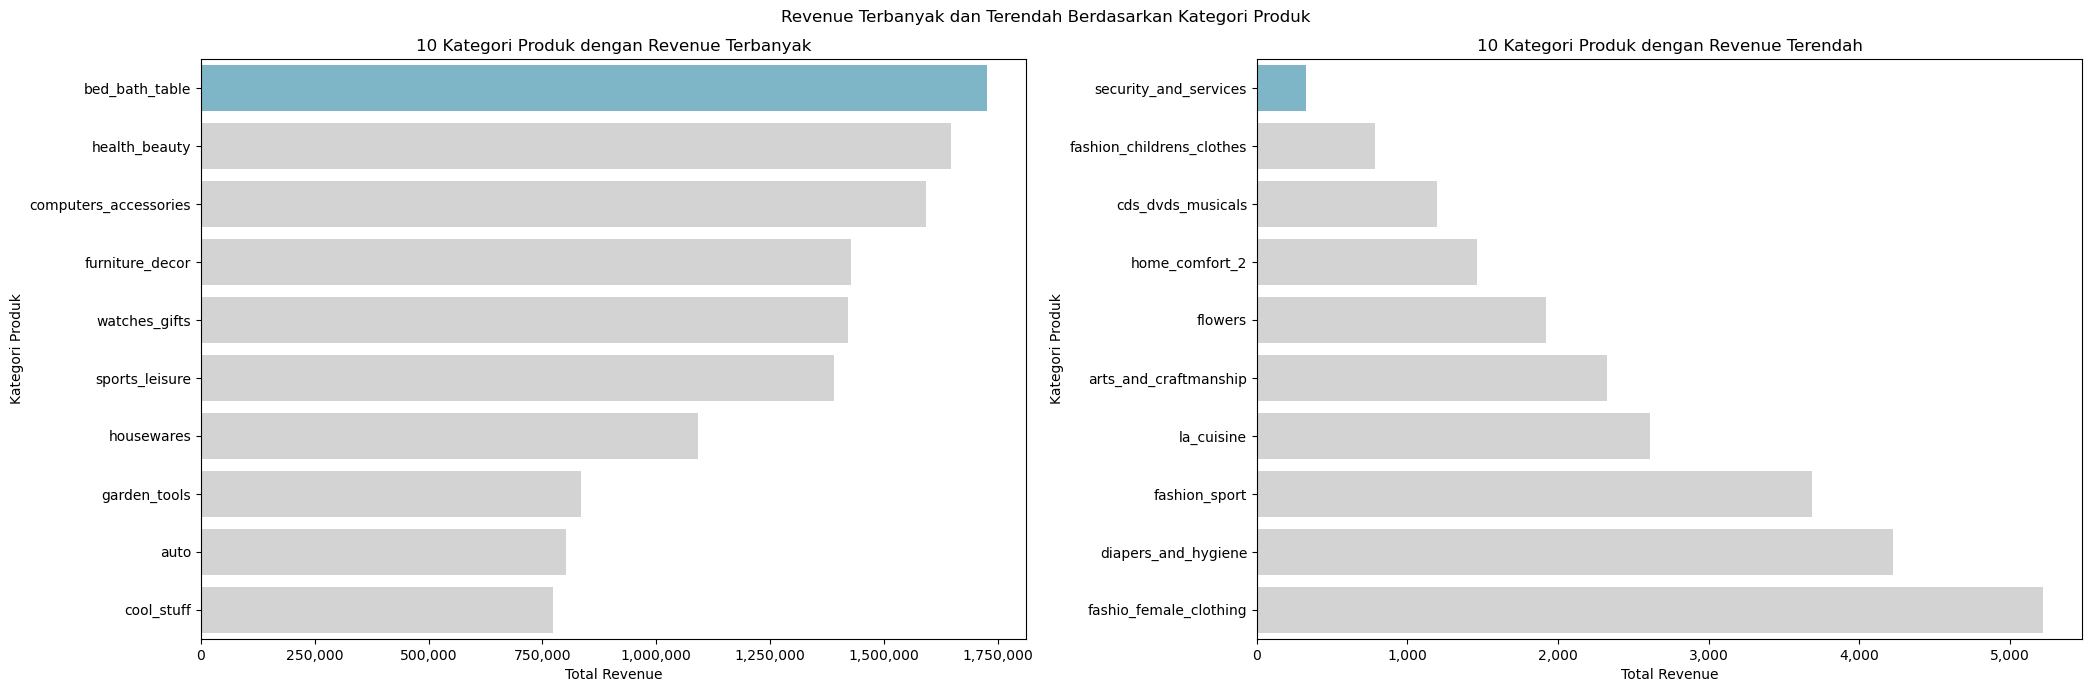

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(21, 7))

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Format sumbu-x ke skala normal
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax[0].xaxis.set_major_formatter(tick)

#Jumlah revenue terbanyak
top_revenue = all_df.groupby('product_category_name_english').payment_value.sum().reset_index()
top_revenue.rename(columns={
  'payment_value' : 'revenue'
  }, inplace=True)

#Plotting bar chart
sns.barplot(x='revenue', y='product_category_name_english', data=top_revenue.nlargest(10, 'revenue'), ax=ax[0], palette=colors_)
ax[0].set_title('10 Kategori Produk dengan Revenue Terbanyak')
ax[0].set_xlabel('Total Revenue')
ax[0].set_ylabel('Kategori Produk')

#Jumlah penjualan terendah
bottom_revenue = all_df.groupby('product_category_name_english').payment_value.sum().reset_index()
bottom_revenue.rename(columns={
  'payment_value' : 'revenue'
  }, inplace=True)

#Plotting bar chart
sns.barplot(x='revenue', y='product_category_name_english', data=bottom_revenue.nsmallest(10, 'revenue'), ax=ax[1], palette=colors_)
ax[1].set_title('10 Kategori Produk dengan Revenue Terendah')
ax[1].set_xlabel('Total Revenue')
ax[1].set_ylabel('Kategori Produk')

# Format sumbu-x ke skala normal
ax[1].xaxis.set_major_formatter(tick)

plt.suptitle("Revenue Terbanyak dan Terendah Berdasarkan Kategori Produk")
plt.tight_layout(pad=1)
plt.show()


Pembayaran yang paling sering dipakai ?

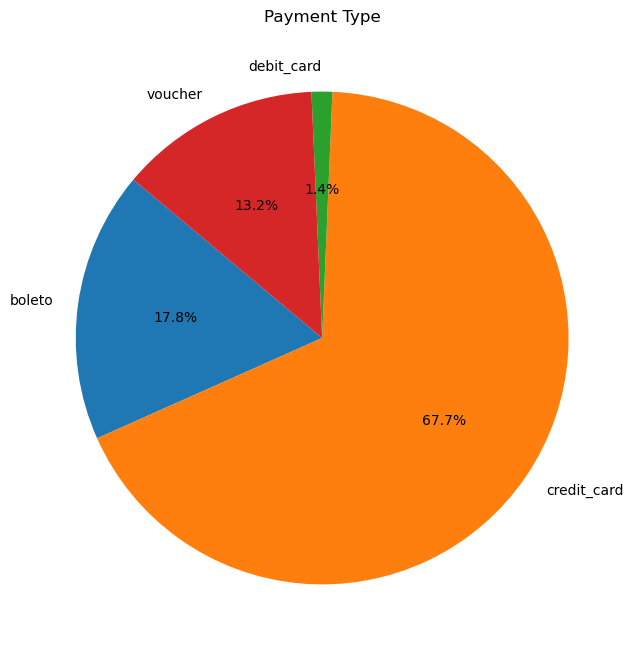

In [30]:
grouped_data = all_df.groupby(by='payment_type').agg({
    'payment_sequential': 'sum'
}).reset_index()

total_payments = grouped_data['payment_sequential'].sum()

# Menghitung persentase untuk setiap jenis pembayaran
grouped_data['percentage'] = (grouped_data['payment_sequential'] / total_payments) * 100

# Plotting diagram pie
plt.figure(figsize=(8, 8))
plt.pie(grouped_data['percentage'], labels=grouped_data['payment_type'], autopct='%1.1f%%', startangle=140)
plt.title('Payment Type')
plt.show()

In [31]:
all_data3 = pd.merge(all_df, df_payment, how = 'left', left_on = 'order_id', right_on = 'order_id')
all_data3['diff'] = all_data3['order_delivered_customer_date'] - all_data3['order_purchase_timestamp']
all_data3['diff'].describe()

count                        135716
mean     12 days 11:09:38.036782693
std       9 days 06:36:21.513082244
min                 0 days 12:48:07
25%                 6 days 17:41:51
50%         10 days 06:50:12.500000
75%         15 days 09:00:58.750000
max               208 days 08:26:32
Name: diff, dtype: object


Berdasarkan hasil deskripsi di atas. Diketahui bahwa meannya bernilai 12 hari. Oleh karena itu, dapat disimpulkan bahwa rata-rata pengiriman barang sampai pada tujuannya dalam jangka waktu 12 hari - 13 hari.
